
<a id='python-by-example'></a>
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# An Introductory Example


<a id='index-0'></a>

## Contents

- [An Introductory Example](#An-Introductory-Example)  
  - [Overview](#Overview)  
  - [The Task: Plotting a White Noise Process](#The-Task:-Plotting-a-White-Noise-Process)  
  - [Version 1](#Version-1)  
  - [Alternative Versions](#Alternative-Versions)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  

We’re now ready to start learning the Python language itself.

The level of this and the next few lectures will suit those with some basic knowledge of programming.

But don’t give up if you have none—you are not excluded.

You just need to cover a few of the fundamentals of programming before returning here.

Good references for first time programmers include:

- The first 5 or 6 chapters of [How to Think Like a Computer Scientist](http://openbookproject.net/thinkcs/python/english3e).  
- [Automate the Boring Stuff with Python](https://automatetheboringstuff.com/).  
- The start of [Dive into Python 3](http://www.diveintopython3.net/).  


Note: These references offer help on installing Python but you should probably stick with the method on our [set up page](https://lectures.quantecon.org/getting_started.html).

You’ll then have an outstanding scientific computing environment (Anaconda) and be ready to move on to the rest of our course.

## Overview

In this lecture, we will write and then pick apart small Python programs.

The objective is to introduce you to basic Python syntax and data structures.

Deeper concepts will be covered in later lectures.

### Prerequisites

The [lecture](https://lectures.quantecon.org/getting_started.html) on getting started with Python.

## The Task: Plotting a White Noise Process

Suppose we want to simulate and plot the white noise
process $ \epsilon_0, \epsilon_1, \ldots, \epsilon_T $, where each draw $ \epsilon_t $ is independent standard normal.

In other words, we want to generate figures that look something like this:

<img src="https://s3-ap-southeast-2.amazonaws.com/lectures.quantecon.org/py/_static/lecture_specific/python_by_example/test_program_1_updated.png" style="">

  
We’ll do this in several different ways.

## Version 1


<a id='ourfirstprog'></a>
Here are a few lines of code that perform the task we set

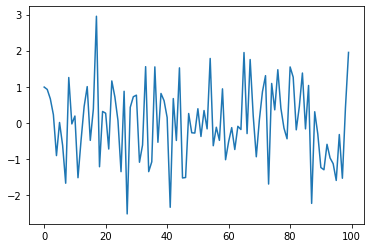

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.randn(100)
plt.plot(x)
plt.show()

Let’s break this program down and see how it works.


<a id='import'></a>

### Import Statements

The first two lines of the program import functionality.

The first line imports [NumPy](https://lectures.quantecon.org/numpy.html), a favorite Python package for tasks like

- working with arrays (vectors and matrices)  
- common mathematical functions like `cos` and `sqrt`  
- generating random numbers  
- linear algebra, etc.  


After `import numpy as np` we have access to these attributes via the syntax `np.`.

Here’s another example

In [2]:
import numpy as np

np.sqrt(4)

2.0

We could also just write

In [3]:
import numpy

numpy.sqrt(4)

2.0

But the former method is convenient and more standard.

#### Why all the Imports?

Remember that Python is a general-purpose language.

The core language is quite small so it’s easy to learn and maintain.

When you want to do something interesting with Python, you almost always need
to import additional functionality.

Scientific work in Python is no exception.

Most of our programs start off with lines similar to the `import` statements seen above.

#### Packages


<a id='index-1'></a>
As stated above, NumPy is a Python *package*.

Packages are used by developers to organize a code library.

In fact, a package is just a directory containing

1. files with Python code — called **modules** in Python speak  
1. possibly some compiled code that can be accessed by Python (e.g., functions compiled from C or FORTRAN code)  
1. a file called `__init__.py` that specifies what will be executed when we type `import package_name`  


In fact, you can find and explore the directory for NumPy on your computer easily enough if you look around.

On this machine, it’s located in

```ipython
anaconda3/lib/python3.6/site-packages/numpy
```


#### Subpackages


<a id='index-2'></a>
Consider the line `x = np.random.randn(100)`.

Here `np` refers to the package NumPy, while `random` is a **subpackage** of NumPy.

You can see the contents [here](https://github.com/numpy/numpy/tree/master/numpy/random).

Subpackages are just packages that are subdirectories of another package.

### Importing Names Directly

Recall this code that we saw above

In [4]:
import numpy as np

np.sqrt(4)

2.0

Here’s another way to access NumPy’s square root function

In [5]:
from numpy import sqrt

sqrt(4)

2.0

This is also fine.

The advantage is less typing if we use `sqrt` often in our code.

The disadvantage is that, in a long program, these two lines might be
separated by many other lines.

Then it’s harder for readers to know where `sqrt` came from, should they wish to.

## Alternative Versions

Let’s try writing some alternative versions of [our first program](#ourfirstprog).

Our aim in doing this is to illustrate some more Python syntax and semantics.

The programs below are less efficient but

- help us understand basic constructs like loops  
- illustrate common data types like lists  

### A Version with a For Loop

Here’s a version that illustrates loops and Python lists.


<a id='firstloopprog'></a>

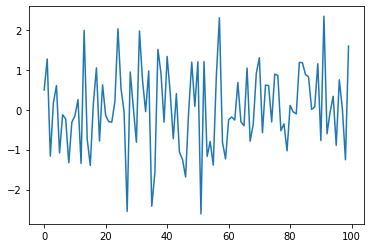

In [6]:
ts_length = 100
ϵ_values = []   # Empty list

for i in range(ts_length):
    e = np.random.randn()
    ϵ_values.append(e)

plt.plot(ϵ_values)
plt.show()

In brief,

- The first pair of lines `import` functionality as before.  
- The next line sets the desired length of the time series.  
- The next line creates an empty *list* called `ϵ_values` that will store the $ \epsilon_t $ values as we generate them.  
- The next three lines are the `for` loop, which repeatedly draws a new random number $ \epsilon_t $ and appends it to the end of the list `ϵ_values`.  
- The last two lines generate the plot and display it to the user.  


Let’s study some parts of this program in more detail.


<a id='lists-ref'></a>

### Lists


<a id='index-3'></a>
Consider the statement `ϵ_values = []`, which creates an empty list.

Lists are a *native Python data structure* used to group a collection of objects.

For example, try

In [7]:
x = [10, 'foo', False]  # We can include heterogeneous data inside a list
type(x)

list

The first element of `x` is an [integer](https://en.wikipedia.org/wiki/Integer_%28computer_science%29), the next is a [string](https://en.wikipedia.org/wiki/String_%28computer_science%29) and the third is a [Boolean value](https://en.wikipedia.org/wiki/Boolean_data_type).

When adding a value to a list, we can use the syntax `list_name.append(some_value)`

In [8]:
x

[10, 'foo', False]

In [9]:
x.append(2.5)
x

[10, 'foo', False, 2.5]

Here `append()` is what’s called a *method*, which is a function “attached to” an object—in this case, the list `x`.

We’ll learn all about methods later on, but just to give you some idea,

- Python objects such as lists, strings, etc. all have methods that are used
  to manipulate the data contained in the object.  
- String objects have [string methods](https://docs.python.org/3/library/stdtypes.html#string-methods), list objects have [list methods](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists), etc.  


Another useful list method is `pop()`

In [10]:
x

[10, 'foo', False, 2.5]

In [11]:
x.pop()

2.5

In [12]:
x

[10, 'foo', False]

The full set of list methods can be found [here](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists).

Following C, C++, Java, etc., lists in Python are zero-based

In [13]:
x

[10, 'foo', False]

In [14]:
x[0]

10

In [15]:
x[1]

'foo'

### The For Loop


<a id='index-4'></a>
Now let’s consider the `for` loop from [the program above](#firstloopprog), which was

In [16]:
for i in range(ts_length):
    e = np.random.randn()
    ϵ_values.append(e)

Python executes the two indented lines `ts_length` times before moving on.

These two lines are called a `code block`, since they comprise the “block” of code that we are looping over.

Unlike most other languages, Python knows the extent of the code block *only from indentation*.

In our program, indentation decreases after line `ϵ_values.append(e)`, telling Python that this line marks the lower limit of the code block.

More on indentation below—for now, let’s look at another example of a `for` loop

In [17]:
animals = ['dog', 'cat', 'bird']
for animal in animals:
    print("The plural of " + animal + " is " + animal + "s")

The plural of dog is dogs
The plural of cat is cats
The plural of bird is birds


This example helps to clarify how the `for` loop works:  When we execute a
loop of the form

```python3
for variable_name in sequence:
    <code block>
```


The Python interpreter performs the following:

- For each element of the `sequence`, it “binds” the name `variable_name` to that element and then executes the code block.  


The `sequence` object can in fact be a very general object, as we’ll see
soon enough.

### Code Blocks and Indentation


<a id='index-5'></a>
In discussing the `for` loop, we explained that the code blocks being looped over are delimited by indentation.

In fact, in Python, **all** code blocks (i.e., those occurring inside loops, if clauses, function definitions, etc.) are delimited by indentation.

Thus, unlike most other languages, whitespace in Python code affects the output of the program.

Once you get used to it, this is a good thing: It

- forces clean, consistent indentation, improving readability  
- removes clutter, such as the brackets or end statements used in other languages  


On the other hand, it takes a bit of care to get right, so please remember:

- The line before the start of a code block always ends in a colon  
  
  - `for i in range(10):`  
  - `if x > y:`  
  - `while x < 100:`  
  - etc., etc.  
  
- All lines in a code block **must have the same amount of indentation**.  
- The Python standard is 4 spaces, and that’s what you should use.  

#### Tabs vs Spaces

One small “gotcha” here is the mixing of tabs and spaces, which often leads to errors.

(Important: Within text files, the internal representation of tabs and spaces is not the same)

You can use your `Tab` key to insert 4 spaces, but you need to make sure it’s configured to do so.

If you are using a Jupyter notebook you will have no problems here.

Also, good text editors will allow you to configure the Tab key to insert spaces instead of tabs — trying searching online.

### While Loops


<a id='index-6'></a>
The `for` loop is the most common technique for iteration in Python.

But, for the purpose of illustration, let’s modify [the program above](#firstloopprog) to use a `while` loop instead.


<a id='whileloopprog'></a>

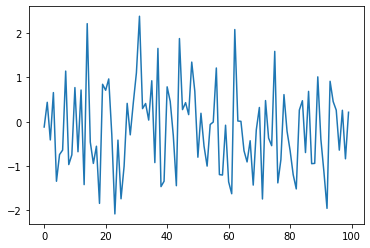

In [18]:
ts_length = 100
ϵ_values = []
i = 0
while i < ts_length:
    e = np.random.randn()
    ϵ_values.append(e)
    i = i + 1
plt.plot(ϵ_values)
plt.show()

Note that

- the code block for the `while` loop is again delimited only by indentation  
- the statement  `i = i + 1` can be replaced by `i += 1`  



<a id='user-defined-functions'></a>

### User-Defined Functions


<a id='index-7'></a>
Now let’s go back to the `for` loop, but restructure our program to make the logic clearer.

To this end, we will break our program into two parts:

1. A *user-defined function* that generates a list of random variables.  
1. The main part of the program that  
  
  1. calls this function to get data  
  1. plots the data  
  


This is accomplished in the next program


<a id='funcloopprog'></a>

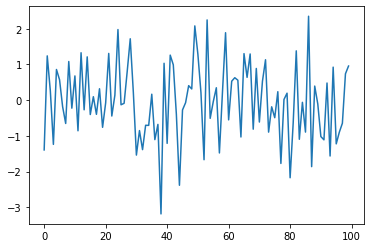

In [19]:
def generate_data(n):
    ϵ_values = []
    for i in range(n):
        e = np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100)
plt.plot(data)
plt.show()

Let’s go over this carefully, in case you’re not familiar with functions and
how they work.

We have defined a function called `generate_data()` as follows

- `def` is a Python keyword used to start function definitions.  
- `def generate_data(n):` indicates that the function is called `generate_data` and that it has a single argument `n`.  
- The indented code is a code block called the *function body*—in this case, it creates an IID list of random draws using the same logic as before.  
- The `return` keyword indicates that `ϵ_values` is the object that should be returned to the calling code.  


This whole function definition is read by the Python interpreter and stored in memory.

When the interpreter gets to the expression `generate_data(100)`, it executes the function body with `n` set equal to 100.

The net result is that the name `data` is *bound* to the list `ϵ_values` returned by the function.

### Conditions


<a id='index-8'></a>
Our function `generate_data()` is rather limited.

Let’s make it slightly more useful by giving it the ability to return either standard normals or uniform random variables on $ (0, 1) $ as required.

This is achieved the next piece of code.


<a id='funcloopprog2'></a>

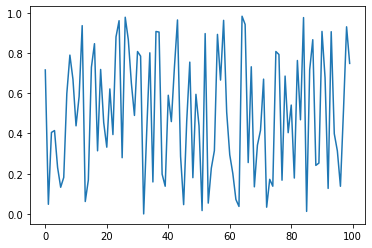

In [21]:
def generate_data(n, generator_type):
    ϵ_values = []
    for i in range(n):
        if generator_type == 'U':
            e = np.random.uniform(0, 1)
        else:
            e = np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100, 'U')
plt.plot(data)
plt.show()

Hopefully, the syntax of the if/else clause is self-explanatory, with indentation again delimiting the extent of the code blocks.

Notes

- We are passing the argument `U` as a string, which is why we write it as `'U'`.  
- Notice that equality is tested with the `==` syntax, not `=`.  
  
  - For example, the statement `a = 10` assigns the name `a` to the value `10`.  
  - The expression `a == 10` evaluates to either `True` or `False`, depending on the value of `a`.  
  


Now, there are several ways that we can simplify the code above.

For example, we can get rid of the conditionals all together by just passing the desired generator type *as a function*.

To understand this, consider the following version.


<a id='test-program-6'></a>

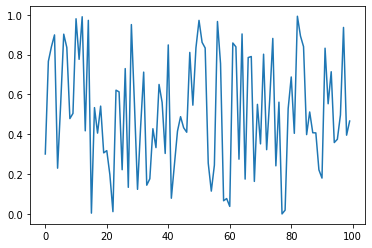

In [22]:
def generate_data(n, generator_type):
    ϵ_values = []
    for i in range(n):
        e = generator_type()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100, np.random.uniform)
plt.plot(data)
plt.show()

Now, when we call the function `generate_data()`, we pass `np.random.uniform`
as the second argument.

This object is a *function*.

When the function call  `generate_data(100, np.random.uniform)` is executed, Python runs the function code block with `n` equal to 100 and the name `generator_type` “bound” to the function `np.random.uniform`.

- While these lines are executed, the names `generator_type` and `np.random.uniform` are “synonyms”, and can be used in identical ways.  


This principle works more generally—for example, consider the following piece of code

In [23]:
max(7, 2, 4)   # max() is a built-in Python function

7

In [24]:
m = max
m(7, 2, 4)

7

Here we created another name for the built-in function `max()`, which could then be used in identical ways.

In the context of our program, the ability to bind new names to functions means that there is no problem *passing a function as an argument to another function*—as we did above.

### List Comprehensions


<a id='index-9'></a>
We can also simplify the code for generating the list of random draws considerably by using something called a *list comprehension*.

List comprehensions are an elegant Python tool for creating lists.

Consider the following example, where the list comprehension is on the
right-hand side of the second line

In [25]:
animals = ['dog', 'cat', 'bird']
plurals = [animal + 's' for animal in animals]
plurals

['dogs', 'cats', 'birds']

Here’s another example

In [26]:
range(8)

range(0, 8)

In [27]:
doubles = [2 * x for x in range(8)]
doubles

[0, 2, 4, 6, 8, 10, 12, 14]

With the list comprehension syntax, we can simplify the lines

```python3
ϵ_values = []
for i in range(n):
    e = generator_type()
    ϵ_values.append(e)
```


into

```python3
ϵ_values = [generator_type() for i in range(n)]
```


## Exercises


<a id='pbe-ex1'></a>

### Exercise 1

Recall that $ n! $ is read as “$ n $ factorial” and defined as
$ n! = n \times (n - 1) \times \cdots \times 2 \times 1 $.

There are functions to compute this in various modules, but let’s
write our own version as an exercise.

In particular, write a function `factorial` such that `factorial(n)` returns $ n! $
for any positive integer $ n $.


<a id='pbe-ex2'></a>

In [38]:
def factorial(n):
    m = np.prod(range(1,n))
    return m
factorial(5)

24

### Exercise 2

The [binomial random variable](https://en.wikipedia.org/wiki/Binomial_distribution) $ Y \sim Bin(n, p) $ represents the number of successes in $ n $ binary trials, where each trial succeeds with probability $ p $.

Without any import besides `from numpy.random import uniform`, write a function
`binomial_rv` such that `binomial_rv(n, p)` generates one draw of $ Y $.

Hint: If $ U $ is uniform on $ (0, 1) $ and $ p \in (0,1) $, then the expression `U < p` evaluates to `True` with probability $ p $.


<a id='pbe-ex3'></a>

In [54]:
from numpy.random import uniform
def binomial_rv(n,p):
    c = 0
    for i in range(n):
        u = uniform(0,1)
        if u < p:
            c += 1 
    return c


5

### Exercise 3

Compute an approximation to $ \pi $ using Monte Carlo.  Use no imports besides

In [63]:
from random import uniform
from math import sqrt
def pi(n):
    count = 0
    for i in range(n):
        x , y = uniform(0,1) , uniform(0,1)
        d = sqrt((x - 0.5)**2+(y - 0.5)**2)
        if d <= 0.5:
            count += 1
    return count*4/n

In [65]:
pi(10000000)

3.1410488

Your hints are as follows:

- If $ U $ is a bivariate uniform random variable on the unit square $ (0, 1)^2 $, then the probability that $ U $ lies in a subset $ B $ of $ (0,1)^2 $ is equal to the area of $ B $.  
- If $ U_1,\ldots,U_n $ are IID copies of $ U $, then, as $ n $ gets large, the fraction that falls in $ B $, converges to the probability of landing in $ B $.  
- For a circle, area = pi * radius^2.  



<a id='pbe-ex4'></a>

### Exercise 4

Write a program that prints one realization of the following random device:

- Flip an unbiased coin 10 times.  
- If 3 consecutive heads occur one or more times within this sequence, pay one dollar.  
- If not, pay nothing.  


Use no import besides `from numpy.random import uniform`.


<a id='pbe-ex5'></a>

In [105]:
from numpy.random import uniform
def gamble():
    count = 0
#    check = []
    for i in range(10):
        v = uniform(0,1)
#        check.append(v)
        count = count + 1 if v < 0.5 else 0
#    print (check)
    if count >= 3:
        print ("You earned $1")
    else: 
        print ("You earned $0")

In [117]:
gamble()



You earned $0


[range(0, 10)]

### Exercise 5

Your next task is to simulate and plot the correlated time series

$$
x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,T
$$

The sequence of shocks $ \{\epsilon_t\} $ is assumed to be IID and standard normal.

In your solution, restrict your import statements to

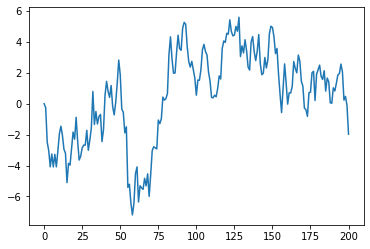

In [125]:
import numpy as np
import matplotlib.pyplot as plt
def Timeseries(alpha, T):   
    x = []
   
    x0 = 0
    for i in range(T + 1):
        x.append(x0)
        x0 = alpha*x0+np.random.normal()
    return x
plt.plot(Timeseries(0.9, 200))


Set $ T=200 $ and $ \alpha = 0.9 $.


<a id='pbe-ex6'></a>

### Exercise 6

To do the next exercise, you will need to know how to produce a plot legend.

The following example should be sufficient to convey the idea

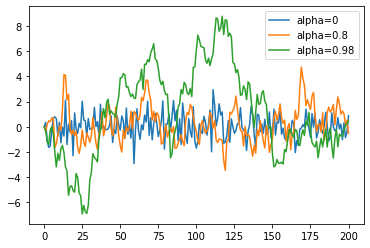

In [129]:
import numpy as np
import matplotlib.pyplot as plt

x,y,z = Timeseries(0,200), Timeseries(0.8,200), Timeseries(0.98,200)
plt.plot(x,label="alpha=0")
plt.plot(y,label="alpha=0.8")
plt.plot(z,label="alpha=0.98")
plt.legend()
plt.show()

Now, starting with your solution to exercise 5, plot three simulated time series,
one for each of the cases $ \alpha=0 $, $ \alpha=0.8 $ and $ \alpha=0.98 $.

In particular, you should produce (modulo randomness) a figure that looks as follows

<img src="https://s3-ap-southeast-2.amazonaws.com/lectures.quantecon.org/py/_static/lecture_specific/python_by_example/pbe_ex2_fig.png" style="">

  
(The figure nicely illustrates how time series with the same one-step-ahead conditional volatilities, as these three processes have, can have very different unconditional volatilities.)

Use a `for` loop to step through the $ \alpha $ values.

Important hints:

- If you call the `plot()` function multiple times before calling `show()`, all of the lines you produce will end up on the same figure.  
  
  - And if you omit the argument `'b-'` to the plot function, Matplotlib will automatically select different colors for each line.  
  
- The expression `'foo' + str(42)` evaluates to `'foo42'`.  

## Solutions

### Exercise 1

In [ ]:
def factorial(n):
    k = 1
    for i in range(n):
        k = k * (i + 1)
    return k

factorial(4)

### Exercise 2

In [ ]:
from numpy.random import uniform

def binomial_rv(n, p):
    count = 0
    for i in range(n):
        U = uniform()
        if U < p:
            count = count + 1    # Or count += 1
    return count

binomial_rv(10, 0.5)

### Exercise 3

Consider the circle of diameter 1 embedded in the unit square.

Let $ A $ be its area and let $ r=1/2 $ be its radius.

If we know $ \pi $ then we can compute $ A $ via
$ A = \pi r^2 $.

But here the point is to compute $ \pi $, which we can do by
$ \pi = A / r^2 $.

Summary: If we can estimate the area of the unit circle, then dividing
by $ r^2 = (1/2)^2 = 1/4 $ gives an estimate of $ \pi $.

We estimate the area by sampling bivariate uniforms and looking at the
fraction that falls into the unit circle

In [ ]:
n = 100000

count = 0
for i in range(n):
    u, v = np.random.uniform(), np.random.uniform()
    d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)
    if d < 0.5:
        count += 1

area_estimate = count / n

print(area_estimate * 4)  # dividing by radius**2

### Exercise 4

In [ ]:
from numpy.random import uniform

payoff = 0
count = 0

for i in range(10):
    U = uniform()
    count = count + 1 if U < 0.5 else 0
    if count == 3:
        payoff = 1

print(payoff)

### Exercise 5

The next line embeds all subsequent figures in the browser itself

In [ ]:
α = 0.9
ts_length = 200
current_x = 0

x_values = []
for i in range(ts_length + 1):
    x_values.append(current_x)
    current_x = α * current_x + np.random.randn()
plt.plot(x_values)
plt.show()

### Exercise 6

In [ ]:
αs = [0.0, 0.8, 0.98]
ts_length = 200

for α in αs:
    x_values = []
    current_x = 0
    for i in range(ts_length):
        x_values.append(current_x)
        current_x = α * current_x + np.random.randn()
    plt.plot(x_values, label=f'α = {α}')
plt.legend()
plt.show()